In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")




from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Information :

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Imputing missing cols and dropping unnecessary columns :

In [5]:
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

In [6]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [7]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

In [8]:
train_df.drop(['SibSp', 'Parch'], axis = 1, inplace =  True)

In [9]:
titles = ['Mr', 'Miss', 'Mrs', 'Master', 'Other', 'Mlle', 'Ms', 'Mme']

In [10]:
def extract_title(name):
    title = name.split('.')[0].split(' ')[-1]
    
    if title not in titles:
        return titles[4]
    else:
        return title

In [11]:
train_df['Title'] = train_df.apply(lambda x: extract_title(x['Name']), axis=1)

In [12]:
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

In [13]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1,Mr


In [14]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
train_df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [16]:
train_df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [17]:
train_df.drop(['PassengerId', 'Cabin', 'Ticket'], axis = 1, inplace = True)

# EDA :

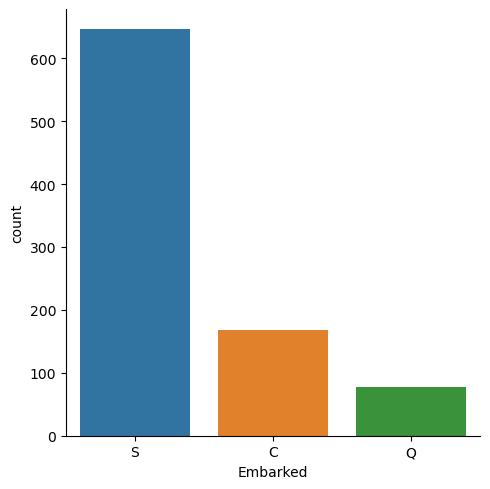

In [18]:
sns.catplot(x="Embarked", kind="count",data=train_df)
plt.show()

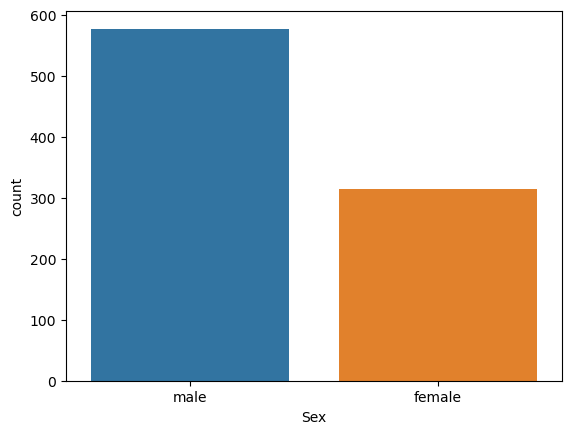

In [19]:
sns.countplot(data = train_df, x = 'Sex')
plt.show()

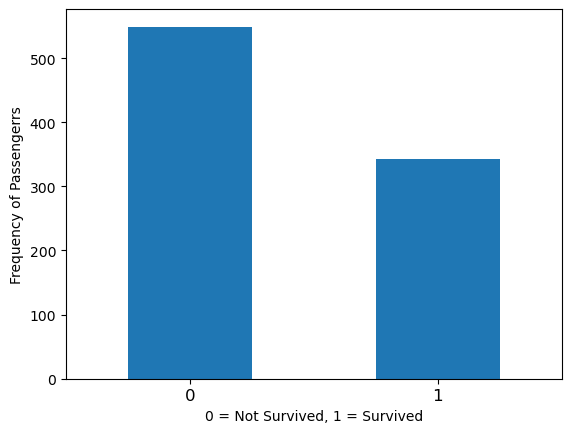

In [20]:
train_df['Survived'].value_counts().plot(kind = 'bar')
plt.xlabel('0 = Not Survived, 1 = Survived')
plt.ylabel('Frequency of Passengerrs')
plt.xticks(rotation=0, size=12)
plt.show()

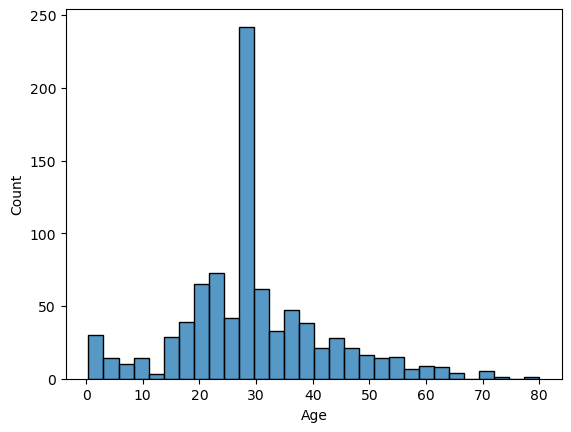

In [21]:
sns.histplot(train_df, x = 'Age')
plt.show()

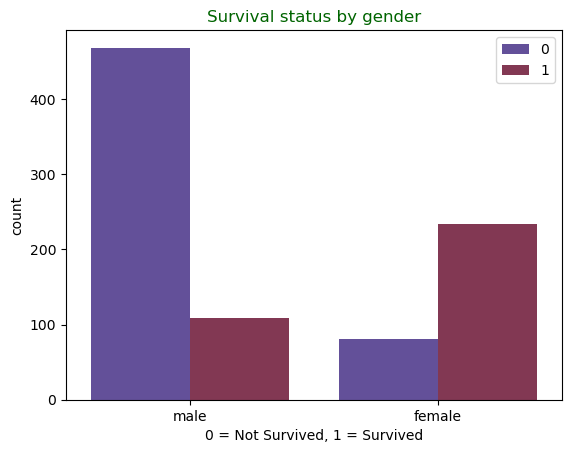

In [22]:
sns.countplot(x = 'Sex', hue = 'Survived', data = train_df, palette="twilight")
plt.title("Survival status by gender", color = "darkgreen")
plt.xlabel("gender")
plt.xlabel('0 = Not Survived, 1 = Survived')
plt.legend()
plt.show()

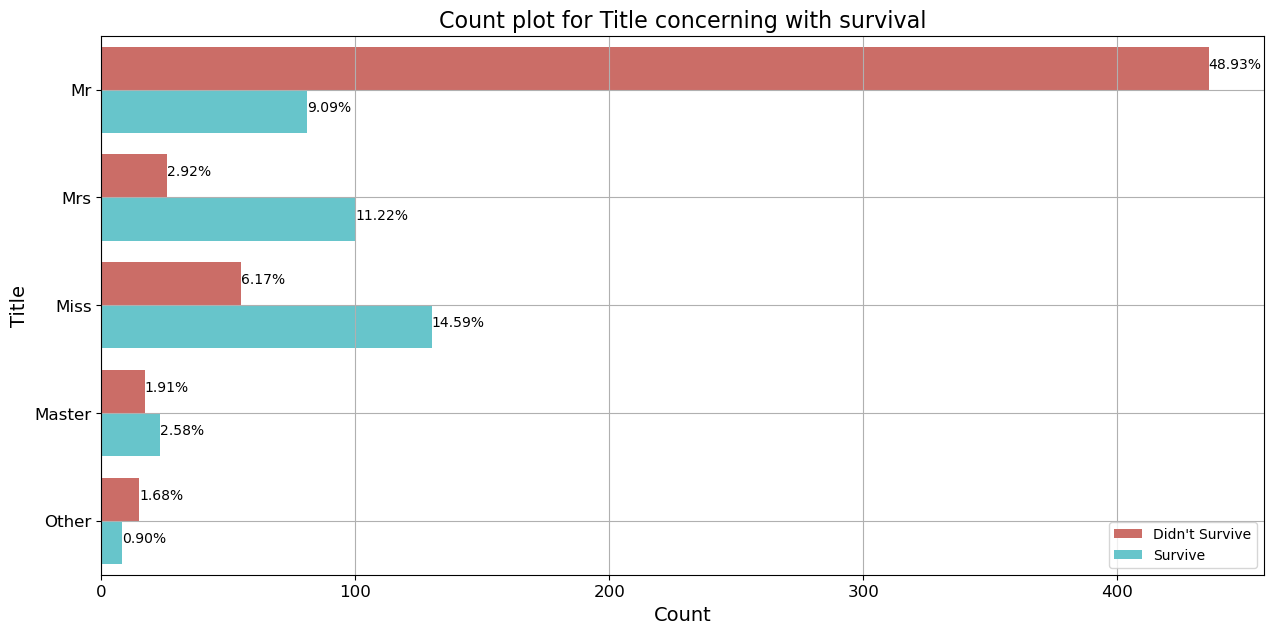

In [23]:
fig = plt.figure(figsize=[15, 7])

ax = sns.countplot(y='Title', hue='Survived', data=train_df, palette='hls')

total = train_df.shape[0]
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))

plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel(xlabel="Count", size=14)
plt.ylabel(ylabel='Title', size=14)
plt.title(label="Count plot for Title concerning with survival", size=16)
plt.legend(labels=["Didn't Survive", "Survive"])
plt.grid(b=True)

# Display the figure
plt.show()

In [24]:
#using map function to convert categorical variable into integer type
train_df['Sex'] = train_df['Sex'].map({'male': 1, 'female': 0})   
train_df['Embarked'] = train_df['Embarked'].map({'S':0, 'C': 1, 'Q': 2})

In [25]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,0,2,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,1,2,Mrs
2,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,0,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,0,2,Mrs
4,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,0,1,Mr


In [26]:
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [27]:
#using dummies for Title column :
train_df = pd.get_dummies(data = train_df, columns = ['Title'])

In [28]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,0,2,0,0,1,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,1,2,0,0,0,1,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,0,1,0,1,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,0,2,0,0,0,1,0
4,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,0,1,0,0,1,0,0


In [29]:
train_df.drop('Name', axis = 1, inplace = True)

In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    int64  
 3   Age           891 non-null    float64
 4   Fare          891 non-null    float64
 5   Embarked      891 non-null    int64  
 6   FamilySize    891 non-null    int64  
 7   Title_Master  891 non-null    uint8  
 8   Title_Miss    891 non-null    uint8  
 9   Title_Mr      891 non-null    uint8  
 10  Title_Mrs     891 non-null    uint8  
 11  Title_Other   891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 53.2 KB


# Train-Test split :

In [31]:
x = train_df.drop('Survived', axis = 1)
y = train_df['Survived']

In [32]:
x

,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,1,22.0,7.2500,0,2,0,0,1,0,0
1,1,0,38.0,71.2833,1,2,0,0,0,1,0
2,3,0,26.0,7.9250,0,1,0,1,0,0,0
3,1,0,35.0,53.1000,0,2,0,0,0,1,0
4,3,1,35.0,8.0500,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,13.0000,0,1,0,0,0,0,1
887,1,0,19.0,30.0000,0,1,0,1,0,0,0
888,3,0,28.0,23.4500,0,4,0,1,0,0,0
889,1,1,26.0,30.0000,1,1,0,0,1,0,0


In [33]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state = 42)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 11)
(179, 11)
(712,)
(179,)


In [36]:
#using MinMaxScaler :
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [37]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Freature Selection :

In [38]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

selector = SelectFromModel(estimator=RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(x, y)

selected_feat = x.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)


Total Features Selected are 4
Threshold set by Model: 0.09
Important Features: ['Sex', 'Age', 'Fare', 'Title_Mr']


# Feature Importance :

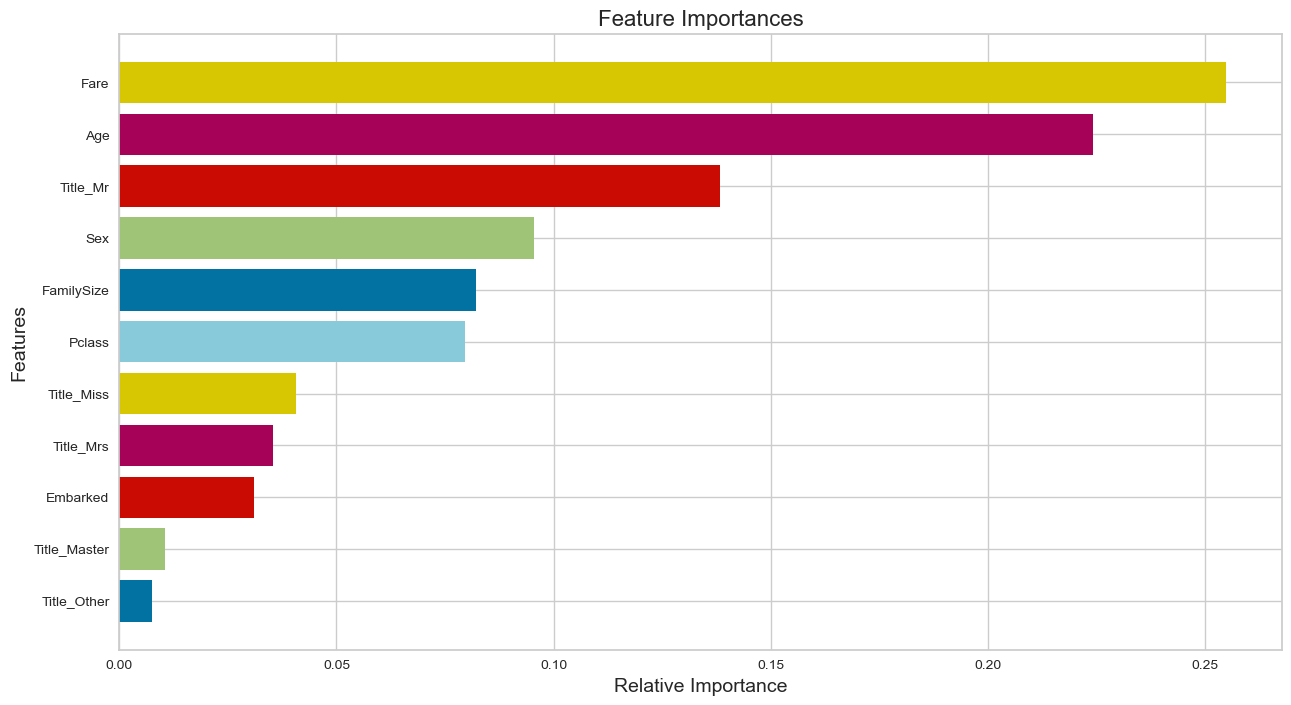

In [39]:
from yellowbrick.model_selection import FeatureImportances 

figure = plt.figure(figsize=[15, 8])
viz = FeatureImportances(selector.estimator, relative=False)
viz.fit(x, y)

plt.xlabel('Relative Importance', size=14)
plt.ylabel('Features', size=14)
plt.title(label='Feature Importances', size=16)
plt.show()

# 1. Base line Model DecisionTreeClassifier :

In [40]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [41]:
y_pred_dt_train = dtree.predict(x_train)
y_pred_dt_test = dtree.predict(x_test)

# Model Evaluation :

In [42]:
def modelEval(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    class_rep = classification_report(actual, predicted)
    print(cm)
    print('The accuracy of the Model is :', accuracy)
    print(class_rep)

In [43]:
print('                    Training Report           ')
modelEval(y_train, y_pred_dt_train)

                    Training Report           
[[443   1]
 [ 12 256]]
The accuracy of the Model is : 0.9817415730337079
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       444
           1       1.00      0.96      0.98       268

    accuracy                           0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712



In [44]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_dt_test)

               Testing Report                            
[[82 23]
 [20 54]]
The accuracy of the Model is : 0.7597765363128491
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       105
           1       0.70      0.73      0.72        74

    accuracy                           0.76       179
   macro avg       0.75      0.76      0.75       179
weighted avg       0.76      0.76      0.76       179



# Hyperparameter tuning on DecisionTreeClassifier:

In [45]:
parameters = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']}

In [46]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
clf_grid = GridSearchCV(tree, param_grid = parameters)
clf_grid.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [47]:
final_model = clf_grid.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5, max_features='log2')

In [48]:
tree = DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5, max_features='log2')
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5, max_features='log2')

In [49]:
y_pred_tree_train = tree.predict(x_train)
y_pred_tree_test = tree.predict(x_test)

# Model Evaluation :

In [50]:
print('                    Training Report           ')
modelEval(y_train, y_pred_tree_train)

                    Training Report           
[[402  42]
 [ 72 196]]
The accuracy of the Model is : 0.8398876404494382
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       444
           1       0.82      0.73      0.77       268

    accuracy                           0.84       712
   macro avg       0.84      0.82      0.83       712
weighted avg       0.84      0.84      0.84       712



In [51]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_tree_test)

               Testing Report                            
[[89 16]
 [22 52]]
The accuracy of the Model is : 0.7877094972067039
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.76      0.70      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



# AdaBoost Classifier :

In [52]:
from sklearn.ensemble import AdaBoostClassifier

ada_tree = DecisionTreeClassifier()
ada_class = AdaBoostClassifier(base_estimator = ada_tree)
ada_class.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [53]:
y_pred_ada_train = ada_class.predict(x_train)
y_pred_ada_test = ada_class.predict(x_test)

In [54]:
print('                    Training Report           ')
modelEval(y_train, y_pred_ada_train)

                    Training Report           
[[442   2]
 [ 11 257]]
The accuracy of the Model is : 0.9817415730337079
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       444
           1       0.99      0.96      0.98       268

    accuracy                           0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712



In [55]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_ada_test)

               Testing Report                            
[[89 16]
 [17 57]]
The accuracy of the Model is : 0.8156424581005587
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# Baseline Model RandomForestClassifier :

In [56]:
from sklearn.ensemble import RandomForestClassifier

clf_randF = RandomForestClassifier()
clf_randF.fit(x_train, y_train)

RandomForestClassifier()

In [57]:
y_pred_rf_train = clf_randF.predict(x_train)
y_pred_rf_test = clf_randF.predict(x_test)

# Model Evaluation :

In [58]:
print('                    Training Report           ')
modelEval(y_train, y_pred_rf_train)

                    Training Report           
[[441   3]
 [ 10 258]]
The accuracy of the Model is : 0.9817415730337079
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       444
           1       0.99      0.96      0.98       268

    accuracy                           0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712



In [59]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_rf_test)

               Testing Report                            
[[87 18]
 [15 59]]
The accuracy of the Model is : 0.8156424581005587
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       105
           1       0.77      0.80      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# Hyperparameter tuning using GridSearchCV :

In [86]:
param_grid = { 
    'n_estimators'      : list(range(10, 50, 10)),
    'max_features'      : ['auto', 'sqrt', 'log2'],
    'criterion'         : ['gini', 'entropy'],
    'max_depth'         : [None, 1, 2, 3, 4, 5],
    'min_samples_split' : list(range(2,5)),
    'min_samples_leaf'  : list(range(1,5)) }

In [87]:
clf_rand = RandomForestClassifier()

In [88]:
grid_rand = GridSearchCV(estimator=clf_rand ,cv = 5,
                                  param_grid=param_grid)

grid_rand.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 20, 30, 40]})

In [89]:
final_model1 = grid_rand.best_estimator_
final_model1

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_leaf=3, n_estimators=30)

In [90]:
clf_rand = RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_leaf=3, n_estimators=30)

clf_rand.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_leaf=3, n_estimators=30)

In [91]:
y_pred_rand_train = clf_rand.predict(x_train)
y_pred_rand_test = clf_rand.predict(x_test)

# Model Evaluation :

In [92]:
print('                    Training Report           ')
modelEval(y_train, y_pred_rand_train)

                    Training Report           
[[416  28]
 [ 77 191]]
The accuracy of the Model is : 0.8525280898876404
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       444
           1       0.87      0.71      0.78       268

    accuracy                           0.85       712
   macro avg       0.86      0.82      0.84       712
weighted avg       0.85      0.85      0.85       712



In [93]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_rand_test)

               Testing Report                            
[[93 12]
 [22 52]]
The accuracy of the Model is : 0.8100558659217877
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



# BaggingClassifier on RandomForest Classifier :

In [97]:
from sklearn.ensemble import BaggingClassifier
clf_rand = RandomForestClassifier()
bag_clf = BaggingClassifier(base_estimator = clf_rand, n_estimators = 30)
bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=30)

In [98]:
y_pred_bag_train = bag_clf.predict(x_train)
y_pred_bag_test = bag_clf.predict(x_test)

# Model Evaluation :

In [99]:
print('                    Training Report           ')
modelEval(y_train, y_pred_bag_train)

                    Training Report           
[[435   9]
 [ 38 230]]
The accuracy of the Model is : 0.9339887640449438
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       444
           1       0.96      0.86      0.91       268

    accuracy                           0.93       712
   macro avg       0.94      0.92      0.93       712
weighted avg       0.94      0.93      0.93       712



In [100]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_bag_test)

               Testing Report                            
[[93 12]
 [13 61]]
The accuracy of the Model is : 0.8603351955307262
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       105
           1       0.84      0.82      0.83        74

    accuracy                           0.86       179
   macro avg       0.86      0.86      0.86       179
weighted avg       0.86      0.86      0.86       179



# GradientBoostingClassifier:

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators = 500)
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=500)

In [102]:
y_pred_grad_train = gb_clf.predict(x_train)
y_pred_grad_test = gb_clf.predict(x_test)

# Model Evaluation :

In [103]:
print('                    Training Report           ')
modelEval(y_train, y_pred_grad_train)

                    Training Report           
[[439   5]
 [ 19 249]]
The accuracy of the Model is : 0.9662921348314607
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       444
           1       0.98      0.93      0.95       268

    accuracy                           0.97       712
   macro avg       0.97      0.96      0.96       712
weighted avg       0.97      0.97      0.97       712



In [104]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_grad_test)

               Testing Report                            
[[90 15]
 [14 60]]
The accuracy of the Model is : 0.8379888268156425
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       105
           1       0.80      0.81      0.81        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



# Hyperparameter tuning on GradientBoost :

In [105]:
hyperparameters = {
    'loss'          : ['deviance', 'exponential'],
    'learning_rate' : [0.01, 0.1, 0.2, 0.3],
    'n_estimators'  : [50, 100, 200],
    'subsample'     : [0.1, 0.2, 0.5, 1.0],
    'max_depth'     : [2, 3, 4, 5]
}

In [107]:
grad_class = GradientBoostingClassifier()

clf_gradboost = GridSearchCV(grad_class, param_grid = hyperparameters, cv = 5)

In [108]:
clf_gradboost.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.1, 0.2, 0.5, 1.0]})

In [112]:
final_model_grad1 = clf_gradboost.best_estimator_

In [113]:
final_model_grad1

GradientBoostingClassifier(learning_rate=0.3, loss='exponential', max_depth=2,
                           n_estimators=50, subsample=0.5)

In [117]:
y_pred_gridboost_train = clf_gradboost.predict(x_train)
y_pred_gridboost_test = clf_gradboost.predict(x_test)

# Model Evaluation :

In [122]:
print('              Training Report                            ')
modelEval(y_train, y_pred_gridboost_train)

              Training Report                            
[[416  28]
 [ 62 206]]
The accuracy of the Model is : 0.8735955056179775
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       444
           1       0.88      0.77      0.82       268

    accuracy                           0.87       712
   macro avg       0.88      0.85      0.86       712
weighted avg       0.87      0.87      0.87       712



In [123]:
print('            Testing Report                    ')
modelEval(y_test, y_pred_gridboost_test)

            Testing Report                    
[[91 14]
 [17 57]]
The accuracy of the Model is : 0.8268156424581006
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



# Base Line Model using KNeighborsClassifier :

In [124]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [125]:
y_pred_kn_train = knn.predict(x_train)
y_pred_kn_test = knn.predict(x_test)

# Model Evaluation :

In [126]:
print('                    Training Report           ')
modelEval(y_train, y_pred_kn_train)

                    Training Report           
[[413  31]
 [ 64 204]]
The accuracy of the Model is : 0.8665730337078652
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       444
           1       0.87      0.76      0.81       268

    accuracy                           0.87       712
   macro avg       0.87      0.85      0.85       712
weighted avg       0.87      0.87      0.86       712



In [127]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_kn_test)

               Testing Report                            
[[87 18]
 [16 58]]
The accuracy of the Model is : 0.8100558659217877
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       105
           1       0.76      0.78      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.81      0.81       179



# Best k value using Elbow method :

In [128]:
error = []

for i in range(1, 40):
    kn_elbow = KNeighborsClassifier(n_neighbors = i)
    kn_elbow.fit(x_train, y_train)
    pred_i = kn_elbow.predict(x_test)
    error.append(np.mean(pred_i != y_test))

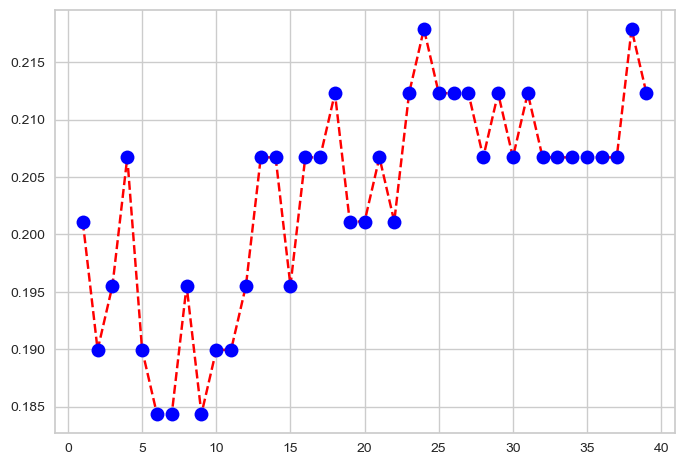

In [129]:
plt.plot(range(1,40), error, color = 'red', linestyle= 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.grid(True)
plt.show()

In [130]:
clf_knn = KNeighborsClassifier(n_neighbors = 9)

clf_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [131]:
y_pred_clfkn_train = clf_knn.predict(x_train)
y_pred_clfkn_test = clf_knn.predict(x_test)

# Model Evaluation :

In [132]:
print('                    Training Report           ')
modelEval(y_train, y_pred_clfkn_train)

                    Training Report           
[[411  33]
 [ 79 189]]
The accuracy of the Model is : 0.8426966292134831
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       444
           1       0.85      0.71      0.77       268

    accuracy                           0.84       712
   macro avg       0.85      0.82      0.83       712
weighted avg       0.84      0.84      0.84       712



In [133]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_clfkn_test)

               Testing Report                            
[[94 11]
 [22 52]]
The accuracy of the Model is : 0.8156424581005587
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



In [153]:
test_df = pd.read_csv('test.csv')

In [154]:
df_test = test_df

In [155]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [156]:
test_df.drop(['PassengerId', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [157]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [158]:
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [159]:
test_df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

In [160]:
test_df['Age'].fillna(test_df['Age'].median(), inplace = True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)

In [161]:
test_df['Title'] = test_df.apply(lambda x: extract_title(x['Name']), axis=1)  

In [162]:
test_df['Title'] = test_df['Title'].replace('Ms', 'Miss')

In [163]:
test_df.head()

,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,Title
0,3,"Kelly, Mr. James",male,34.5,7.8292,Q,1,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,7.0000,S,2,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,9.6875,Q,1,Mr
3,3,"Wirz, Mr. Albert",male,27.0,8.6625,S,1,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,12.2875,S,3,Mrs


In [164]:
test_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [165]:
#using map function to convert categorical variable into integer type
test_df['Sex'] = test_df['Sex'].map({'male': 1, 'female': 0})   
test_df['Embarked'] = test_df['Embarked'].map({'S':0, 'C': 1, 'Q': 2})

In [166]:
#using dummies for Title column :
test_df = pd.get_dummies(data = test_df, columns = ['Title'])

In [167]:
test_df.head()

,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,"Kelly, Mr. James",1,34.5,7.8292,2,1,0,0,1,0,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,7.0000,0,2,0,0,0,1,0
2,2,"Myles, Mr. Thomas Francis",1,62.0,9.6875,2,1,0,0,1,0,0
3,3,"Wirz, Mr. Albert",1,27.0,8.6625,0,1,0,0,1,0,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,12.2875,0,3,0,0,0,1,0


In [168]:
test_df.drop('Name', axis = 1, inplace = True)

In [169]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    int64  
 1   Sex           418 non-null    int64  
 2   Age           418 non-null    float64
 3   Fare          418 non-null    float64
 4   Embarked      418 non-null    int64  
 5   FamilySize    418 non-null    int64  
 6   Title_Master  418 non-null    uint8  
 7   Title_Miss    418 non-null    uint8  
 8   Title_Mr      418 non-null    uint8  
 9   Title_Mrs     418 non-null    uint8  
 10  Title_Other   418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 21.8 KB


In [170]:
test_df = scaler.transform(test_df)

In [172]:
predict = bag_clf.predict(test_df)

In [173]:
list(zip(y_test, predict))

[(1, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 1),
 (1, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 1),
 (1, 0),
 (1, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (1, 1),
 (0, 0),
 (1, 0),
 (1, 0),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 1),
 (1, 0),
 (1, 0),
 (1, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 1),
 (1, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 1),
 (0, 1),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (1, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 

In [174]:
df_test['Survived'] = predict

In [175]:
df_test.head(50)

,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,Title,Survived
0,3,"Kelly, Mr. James",1,34.5,7.8292,2,1,Mr,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,7.0000,0,2,Mrs,0
2,2,"Myles, Mr. Thomas Francis",1,62.0,9.6875,2,1,Mr,0
3,3,"Wirz, Mr. Albert",1,27.0,8.6625,0,1,Mr,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,12.2875,0,3,Mrs,1
5,3,"Svensson, Mr. Johan Cervin",1,14.0,9.2250,0,1,Mr,0
6,3,"Connolly, Miss. Kate",0,30.0,7.6292,2,1,Miss,1
7,2,"Caldwell, Mr. Albert Francis",1,26.0,29.0000,0,3,Mr,0
8,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,7.2292,1,1,Mrs,1
9,3,"Davies, Mr. John Samuel",1,21.0,24.1500,0,3,Mr,0


In [176]:
df_test.to_csv('Submission_titanic.csv', index = False, header = True)